# Course Grapher

In [3]:
from graphviz import Digraph
import json
import pandas as pd
import numpy as np
import graphviz
import pylab

## Summary
This project aims to create an automatically generated tree graph for classes at UCSD. \
The set output is a pdf, as it is a vector file, i.e. has theoretically infinite resolution. \
However, this also makes it non-insertable, since most software will crash trying to export the PDF to PNG.

## Part 1: Data Cleaning

First we import the available prerequisite json, and convert it to a DataFrame.

In [8]:
PrereqData = json.load(open('cse_prereqs.json', 'r'))
Prereqs= pd.DataFrame.from_dict(PrereqData, orient='columns')
Prereqs

,id,prereqs
0,CSE181,[CSE 100]
1,CSE182,[CSE 100]
2,CSE3,
3,CSE4GS,"[[MATH 10A, MATH 20A]]"
4,CSE6GS,"[[MATH 10A, MATH 20A]]"
...,...,...
97,CSE197,
98,CSE197C,
99,CSE198,
100,CSE199,


We then define a cleanup function to clean the `lists` in `prereqs` into an `array` of class names.

In [5]:
def cleanPrereq(PrereqRaw):
    Prereqs = [[]]
    for category in PrereqRaw:
        Categories = []
        for prereq in category:
            Categories.append(prereq['course'])
        Prereqs.append(Categories)
    return Prereqs[1:]

We apply the above function and then rename the columns to standard.

In [7]:
# Prereq = PrereqRaw.assign(prereqs = PrereqRaw.get('prereqs').apply(cleanPrereq))
# Prereq = Prereq.rename(columns = {"course": "Course Name", "prereqs": "Prereqs"})
# Prereq

# # Additional code to export to .csv
# # Prereq.to_csv('Prereq.csv')

We create an additional `sub-DataFrame` for classes that have a prerequisite.

In [10]:
PrereqOnly = Prereqs[Prereqs.get('prereqs').apply(len) != 0]
PrereqOnly

# Additional code to export to .csv
# PrereqOnly.to_csv('PrereqOnly.csv')

,id,prereqs
0,CSE181,[CSE 100]
1,CSE182,[CSE 100]
3,CSE4GS,"[[MATH 10A, MATH 20A]]"
4,CSE6GS,"[[MATH 10A, MATH 20A]]"
7,CSE8B,[CSE 8A]
...,...,...
88,CSE181R,"[[CSE 100, CSE 100R], CSE 101, [BIMM 100, CHEM..."
89,CSE182,"[[CSE 100, CSE 100R]]"
90,CSE184,"[[BIMM 181, BENG 181, CSE 181, BENG 182, BIMM ..."
91,CSE185,"[[CSE 11, CSE 8B], CSE 12, [MATH 20C, MATH 31B..."


We create another `sub-DataFrame` for classes that do NOT have a prerequisite.

In [11]:
PrereqNone = Prereqs[Prereqs.get('prereqs').apply(len) == 0]
PrereqNone

# Additional code to export to .csv
# PrereqNone.to_csv('PrereqNone.csv')

,id,prereqs
2,CSE3,
5,CSE6R,
6,CSE8A,
8,CSE11,
16,CSE42,
19,CSE87,
20,CSE89,
21,CSE90,
22,CSE91,
23,CSE95,


In [13]:
PrereqOnly.get('prereqs').apply(len).unique()

array([1, 5, 3, 2, 4])

In [119]:
colors = np.array([
                   "pink",
                   "lightsteelblue",
                   "lightgreen",
                   "khaki"])

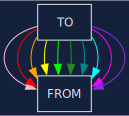

In [15]:
TestGraph = Digraph()

TestGraph.attr('node', shape='rectangle')
TestGraph.attr(bgcolor = '#14213d')
TestGraph.attr('node', color = "#e5e5e5")
TestGraph.attr('node', fontcolor = "#e5e5e5")
TestGraph.attr('node', fontname = 'Gill Sans')
TestGraph.attr('node', fontsize = '12')

TestGraph.node("TO")
TestGraph.node("FROM")

for color in colors:
    TestGraph.edge("TO","FROM",color=color)
    
TestGraph

## Part 2: Full Graph Creation

We will use the GraphViz Library for Python to create the graph. \
We will create a `Digraph()` or directed graph, where the arrow points from a prerequisite to the class. \
Because of that, we will exclude all classes that do not have a prerequisite, or are a prerequisite themselves.

In [ ]:
# # WARNING!!! This code takes a long time to run.

# FullGraph = Digraph()
# for i in np.arange(PrereqOnly.shape[0]):
#     course = dfWithPrereq.get('course').iloc[i]
#     prereqs = dfWithPrereq.get('prereqs').iloc[i]
#     Graph.node(course)
#     for prereq in prereqs:
#         Graph.edge(prereq, course)

In [43]:
# FullGraph

Here, we export the graph into a `PDF`. 

In [44]:
# filename = FullGraph.render(filename='FullGraph/FullGraph')
# pylab.savefig('filename.png')

## Part 3: Filtered Graph Creation

Here, we try and create a general function to create graphs for a filtered `DataFrame`.

In [99]:
def makeGraph(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr(bgcolor = '#ffffff')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                        Graph.edge(prereq, course, color=colors[colorCounter])
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                colorCounter += 1
            
    filename = Graph.render(filename=f'NewResults/{name}/{name}')
    filename_png = Graph.render(filename=f'NewResults/{name}/{name}', format='png')

In [100]:
def makeGraphScaled(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr(bgcolor = '#ffffff')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    node_degrees = {}
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
            node_degrees[course] = 0
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                            node_degrees[prereq] = 0
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        node_degrees[prereq] += 1
                        node_degrees[course] += 1
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                        node_degrees[prereq_group] = 0
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    node_degrees[prereq_group] += 1
                    node_degrees[course] += 1
                colorCounter += 1
    
    max_degree = max(node_degrees.values()) if node_degrees else 1
    min_degree = min(node_degrees.values()) if node_degrees else 1
    
    for node in created_nodes:
        degree = node_degrees.get(node, 0)
        if max_degree > min_degree:
            size = 0.5 + (degree - min_degree) / (max_degree - min_degree) * 5
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}/{name}')
    filename_png = Graph.render(filename=f'NewResults/{name}/{name}', format='png')

In [132]:
def makeGraphInDegree(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    in_degrees = {}
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
            in_degrees[course] = 0
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        distinct_colors_used = set()
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                            in_degrees[prereq] = 0
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        if colors[colorCounter] not in distinct_colors_used:
                            in_degrees[course] += 1
                            distinct_colors_used.add(colors[colorCounter])
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                        in_degrees[prereq_group] = 0
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    if colors[colorCounter] not in distinct_colors_used:
                        in_degrees[course] += 1
                        distinct_colors_used.add(colors[colorCounter])
                colorCounter += 1
    
    max_in_degree = max(in_degrees.values()) if in_degrees else 1
    min_in_degree = min(in_degrees.values()) if in_degrees else 1
    
    for node in created_nodes:
        in_degree = in_degrees.get(node, 0)
        if max_in_degree > min_in_degree:
            size = 0.5 + (in_degree - min_in_degree) / (max_in_degree - min_in_degree) * 5
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}InDegree/{name}InDegree')
    filename_png = Graph.render(filename=f'NewResults/{name}InDegree/{name}InDegree', format='png')

In [102]:
def makeGraphOutDegree(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    out_degrees = {}
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
            out_degrees[course] = 0
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                            out_degrees[prereq] = 0
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        out_degrees[prereq] += 1
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                        out_degrees[prereq_group] = 0
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    out_degrees[prereq_group] += 1
                colorCounter += 1
    
    max_out_degree = max(out_degrees.values()) if out_degrees else 1
    min_out_degree = min(out_degrees.values()) if out_degrees else 1
    
    for node in created_nodes:
        out_degree = out_degrees.get(node, 0)
        if max_out_degree > min_out_degree:
            size = 0.5 + (out_degree - min_out_degree) / (max_out_degree - min_out_degree) * 5
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}OutDegree/{name}OutDegree')
    filename_png = Graph.render(filename=f'NewResults/{name}OutDegree/{name}OutDegree', format='png')

In [103]:
def makeGraphBetweenness(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    edges = []
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        edges.append((prereq, course))
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    edges.append((prereq_group, course))
                colorCounter += 1
    
    betweenness = {}
    nodes_list = list(created_nodes)
    
    for node in nodes_list:
        betweenness[node] = 0
        for i, source in enumerate(nodes_list):
            for j, target in enumerate(nodes_list):
                if i != j and source != node and target != node:
                    paths = 0
                    paths_through_node = 0
                    
                    def count_paths(current, target, visited, path):
                        if current == target:
                            return 1, 1 if node in path else 0
                        if current in visited:
                            return 0, 0
                        
                        visited.add(current)
                        total_paths = 0
                        paths_through = 0
                        
                        for edge in edges:
                            if edge[0] == current:
                                p, pt = count_paths(edge[1], target, visited.copy(), path + [current])
                                total_paths += p
                                paths_through += pt
                        
                        return total_paths, paths_through
                    
                    total, through = count_paths(source, target, set(), [])
                    if total > 0:
                        betweenness[node] += through / total
    
    max_betweenness = max(betweenness.values()) if betweenness else 1
    min_betweenness = min(betweenness.values()) if betweenness else 1
    
    for node in created_nodes:
        btwn = betweenness.get(node, 0)
        if max_betweenness > min_betweenness:
            size = 0.5 + (btwn - min_betweenness) / (max_betweenness - min_betweenness) * 5
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}Betweenness/{name}Betweenness')
    filename_png = Graph.render(filename=f'NewResults/{name}Betweenness/{name}Betweenness', format='png')

In [104]:
def makeGraphEnrollmentImpact(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    enrollment_impact = {}
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
            enrollment_impact[course] = 0
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                            enrollment_impact[prereq] = 0
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        enrollment_impact[prereq] += 1
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                        enrollment_impact[prereq_group] = 0
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    enrollment_impact[prereq_group] += 1
                colorCounter += 1
    
    max_impact = max(enrollment_impact.values()) if enrollment_impact else 1
    min_impact = min(enrollment_impact.values()) if enrollment_impact else 1
    
    for node in created_nodes:
        impact = enrollment_impact.get(node, 0)
        if max_impact > min_impact:
            size = 0.5 + (impact - min_impact) / (max_impact - min_impact) * 5
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}EnrollmentImpact/{name}EnrollmentImpact')
    filename_png = Graph.render(filename=f'NewResults/{name}EnrollmentImpact/{name}EnrollmentImpact', format='png')

In [127]:
def makeGraphTotalDegree(Df, name):
    Graph = Digraph()
    
    Graph.attr(rankdir = 'LR')
    Graph.attr('node', shape='rectangle')
    Graph.attr('node', color = "#000000")
    Graph.attr('node', fontcolor = "#000000")
    Graph.attr('node', fontname = 'Gill Sans')
    Graph.attr('node', fontsize = '12')

    def class_filter(course):
        course = course.replace(' ', '')
        if course.startswith('CSE'):
            return course
        else:
            return None
    
    created_nodes = set()
    edges = []
    
    for i in np.arange(Df.shape[0]):
        course = Df.get('id').iloc[i]
        course = class_filter(course)
        if course is None:
            continue
        if course not in created_nodes:
            Graph.node(course)
            created_nodes.add(course)
        
        prereqs = Df.get('prereqs').iloc[i]
        colorCounter = 0
        
        if isinstance(prereqs, list) and len(prereqs) > 0:
            for prereq_group in prereqs:
                if isinstance(prereq_group, list):
                    for prereq in prereq_group:
                        prereq = class_filter(prereq)
                        if prereq is None:
                            continue
                        if prereq not in created_nodes:
                            Graph.node(prereq)
                            created_nodes.add(prereq)
                        Graph.edge(prereq, course, color=colors[colorCounter])
                        edges.append((prereq, course))
                else:
                    prereq_group = class_filter(prereq_group)
                    if prereq_group is None:
                        continue
                    if prereq_group not in created_nodes:
                        Graph.node(prereq_group)
                        created_nodes.add(prereq_group)
                    Graph.edge(prereq_group, course, color=colors[colorCounter])
                    edges.append((prereq_group, course))
                colorCounter += 1
    
    total_degrees = {}
    
    def calculate_total_dependents(node, visited=None):
        if visited is None:
            visited = set()
        if node in visited:
            return 0
        visited.add(node)
        
        total = 0
        for edge in edges:
            if edge[0] == node:
                total += 1 + calculate_total_dependents(edge[1], visited.copy())
        return total
    
    for node in created_nodes:
        total_degrees[node] = calculate_total_dependents(node)
    
    max_total_degree = max(total_degrees.values()) if total_degrees else 1
    min_total_degree = min(total_degrees.values()) if total_degrees else 1
    
    for node in created_nodes:
        total_degree = total_degrees.get(node, 0)
        if max_total_degree > min_total_degree:
            size = 0.5 + np.log(total_degree - min_total_degree) / np.log(max_total_degree - min_total_degree) * 5 if total_degree > 0 else 1
        else:
            size = 1.0
        Graph.node(node, width=str(size), height=str(size), fontsize=str(12*size))
            
    filename = Graph.render(filename=f'NewResults/{name}TotalDegree/{name}TotalDegree')
    filename_png = Graph.render(filename=f'NewResults/{name}TotalDegree/{name}TotalDegree', format='png')

In [131]:
makeGraph(PrereqOnly, 'Cse')

In [ ]:
# makeGraphScaled(PrereqOnly, 'Cse')

In [133]:
makeGraphInDegree(PrereqOnly, 'Cse')

In [123]:
makeGraphOutDegree(PrereqOnly, 'Cse')

In [124]:
makeGraphBetweenness(PrereqOnly, 'Cse')

In [125]:
makeGraphEnrollmentImpact(PrereqOnly, 'Cse')

In [129]:
makeGraphTotalDegree(PrereqOnly, 'Cse')

Here is a filter for a Math/CS/DSC Major:

In [168]:
FilterMajor = Prereq[(Prereq.get('Course Name').str.contains('MATH')) | 
                     (Prereq.get('Course Name').str.contains('CSE')) |
                     (Prereq.get('Course Name').str.contains('DSC'))]
makeGraph(FilterMajor, 'Major')

The `for` loop creates graphs and folders for department listed.

In [241]:
Departments = ['MATH','CSE','DSC']
for dept in Departments:
    makeGraph(Prereq[Prereq.get('Course Name').str.contains(dept)], dept)

## Filters

Here, we create explicit filters for the CS, Math-CS, and Data Science majors, otherwise known as the three "Computer" majors of UCSD. (Future note: Adding the CAPES dataset may finally the most difficult major!)

### Problem 1: Options

Each major often provides multiple options or `paths` to the completion of a course `category`. For example, the Math-CS major Discrete Math or Combinatorics `category` allows students to choose between MATH 154, MATH 158, MATH 184, or MATH 188.

This is particularly tricky to visualize, since we already use `color` to differentiate between prerequisite `categories`. Our first idea is to utilize `subgraphs`, as shown below:

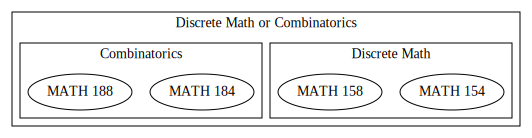

In [243]:
MainGraph = Digraph()

Category = "Discrete Math or Combinatorics"
with MainGraph.subgraph(name = "cluster_"+Category) as TestGraph:
    TestGraph.attr(label = Category)
    
    Category = "Discrete Math"
    with TestGraph.subgraph(name = "cluster_"+Category) as Subgraph:
        Subgraph.attr(label = Category)

        Subgraph.node('MATH 154')
        Subgraph.node('MATH 158')


    Category = "Combinatorics"
    with TestGraph.subgraph(name = "cluster_"+Category) as Subgraph:
        Subgraph.attr(label = Category)

        Subgraph.node('MATH 184')
        Subgraph.node('MATH 188')

MainGraph

This looks promising, so let's see what happens when we generalize the process. We will use 2D Dictionary, so we can name the `categories` while easily accessing them.

In [305]:
MathCSDict = {
    'Calculus' : {
        'Linear Algebra and Calculus' : ["MATH 18","MATH 20A","MATH 20B","MATH 20C","MATH 20D","MATH 20E"],
        'Honors Calculus' : ["MATH 31AH", "MATH 31BH","MATH 31CH", "MATH 20D"]
    },
    'Intro to CS' : {
        'Java' : ["CSE 8A","CSE 8B"],
        'Java (Accelerated)' : ["CSE 11"]
    },
    'Software Tools and Techniques' : ["CSE 15L"],
    'Computer Organization and Systems Programming' : ["CSE 30"],
    'Basic Data Structures and Object-Oriented Design' : ["CSE 12"],
    'Mathematical Reasoning' : ["MATH 109"],
    'Algebra' : {
        'Modern Applied Algebra' : ["MATH 103A","MATH 103B"],
        'Modern Algebra' : ["MATH 100A","MATH 100B"]
    },
    'Theory of Computability' : ["CSE 105"],
    'Computer Implementations of Data Structures' : ["CSE 100"],
    'Intro to Probability' : ["MATH 180A","MATH 183"],
    'Discrete Math or Combinatorics' : ["MATH 154","MATH 158","MATH 184","MATH 188"],
    'Design and Analysis of Algorithms' : ["CSE 101"],
    'Applied Mathematics Electives' : {
        'Option 1' : ["MATH 170A","MATH 170B","MATH 170C","MATH 171A","MATH 171B","MATH 173A","MATH 173B","MATH 174","MATH 175","MATH 179","MATH 180B","MATH 180C","MATH 181A","MATH 181B","MATH 181C","MATH 181E"],
        'Option 2' : ["MATH 170A","MATH 170B","MATH 170C","MATH 171A","MATH 171B","MATH 173A","MATH 173B","MATH 174","MATH 175","MATH 179","MATH 180B","MATH 180C","MATH 181A","MATH 181B","MATH 181C","MATH 181E"]
    },
    'Computational Electives' : {
        'Option 1' : ["MATH 152","MATH 154","MATH 155A","MATH 155B","MATH 157","MATH 158","MATH 160A","MATH 160B","MATH 168A","MATH 182","MATH 184","MATH 185","MATH 187A","MATH 187B","MATH 188","MATH 189",
                      "CSE 107","CSE 110","CSE 120","CSE 121","CSE 123","CSE 124","CSE 127","CSE 130","CSE 131","CSE 132A","CSE 132B","CSE 134B","CSE 140","CSE 140L","CSE 141","CSE 141L","CSE 150A","CSE 150B","CSE 151A","CSE 152A","CSE 152B","CSE 158","CSE 160","CSE 165","CSE 167","CSE 168","CSE 169","CSE 176A",
                      "COGS 108","COGS 118A","COGS 118B","COGS 120","COGS 185","COGS 188"],
        'Option 2' : ["MATH 152","MATH 154","MATH 155A","MATH 155B","MATH 157","MATH 158","MATH 160A","MATH 160B","MATH 168A","MATH 182","MATH 184","MATH 185","MATH 187A","MATH 187B","MATH 188","MATH 189",
                      "CSE 107","CSE 110","CSE 120","CSE 121","CSE 123","CSE 124","CSE 127","CSE 130","CSE 131","CSE 132A","CSE 132B","CSE 134B","CSE 140","CSE 140L","CSE 141","CSE 141L","CSE 150A","CSE 150B","CSE 151A","CSE 152A","CSE 152B","CSE 158","CSE 160","CSE 165","CSE 167","CSE 168","CSE 169","CSE 176A",
                      "COGS 108","COGS 118A","COGS 118B","COGS 120","COGS 185","COGS 188"]
    },
    'General Math-CS Electives' : {
        'Option 1' : ["MATH 170A","MATH 170B","MATH 170C","MATH 171A","MATH 171B","MATH 173A","MATH 173B","MATH 174","MATH 175","MATH 179","MATH 180B","MATH 180C","MATH 181A","MATH 181B","MATH 181C","MATH 181E"] + 
                     ["MATH 152","MATH 154","MATH 155A","MATH 155B","MATH 157","MATH 158","MATH 160A","MATH 160B","MATH 168A","MATH 182","MATH 184","MATH 185","MATH 187A","MATH 187B","MATH 188","MATH 189",
                      "CSE 107","CSE 110","CSE 120","CSE 121","CSE 123","CSE 124","CSE 127","CSE 130","CSE 131","CSE 132A","CSE 132B","CSE 134B","CSE 140","CSE 140L","CSE 141","CSE 141L","CSE 150A","CSE 150B","CSE 151A","CSE 152A","CSE 152B","CSE 158","CSE 160","CSE 165","CSE 167","CSE 168","CSE 169","CSE 176A",
                      "COGS 108","COGS 118A","COGS 118B","COGS 120","COGS 185","COGS 188"] +
                     ["MATH 100C","MATH 102","MATH 104A","MATH 104B","MATH 106","MATH 110","MATH 111A","MATH 111B","MATH 114","MATH 120A","MATH 120B","MATH 130","MATH 140A","MATH 140B","MATH 142A","MATH 142B","MATH 144","MATH 150A","MATH 150B","MATH 163","MATH 181D","MATH 181F","MATH 190A","MATH 190B","MATH 193A","MATH 193B","MATH 194"],
        'Option 2' : ["MATH 170A","MATH 170B","MATH 170C","MATH 171A","MATH 171B","MATH 173A","MATH 173B","MATH 174","MATH 175","MATH 179","MATH 180B","MATH 180C","MATH 181A","MATH 181B","MATH 181C","MATH 181E"] + 
                     ["MATH 152","MATH 154","MATH 155A","MATH 155B","MATH 157","MATH 158","MATH 160A","MATH 160B","MATH 168A","MATH 182","MATH 184","MATH 185","MATH 187A","MATH 187B","MATH 188","MATH 189",
                      "CSE 107","CSE 110","CSE 120","CSE 121","CSE 123","CSE 124","CSE 127","CSE 130","CSE 131","CSE 132A","CSE 132B","CSE 134B","CSE 140","CSE 140L","CSE 141","CSE 141L","CSE 150A","CSE 150B","CSE 151A","CSE 152A","CSE 152B","CSE 158","CSE 160","CSE 165","CSE 167","CSE 168","CSE 169","CSE 176A",
                      "COGS 108","COGS 118A","COGS 118B","COGS 120","COGS 185","COGS 188"] +
                     ["MATH 100C","MATH 102","MATH 104A","MATH 104B","MATH 106","MATH 110","MATH 111A","MATH 111B","MATH 114","MATH 120A","MATH 120B","MATH 130","MATH 140A","MATH 140B","MATH 142A","MATH 142B","MATH 144","MATH 150A","MATH 150B","MATH 163","MATH 181D","MATH 181F","MATH 190A","MATH 190B","MATH 193A","MATH 193B","MATH 194"]
    }
}

Using Dictionaries, though easily generatable into nodes with subgraphs, makes it difficult to create the edges, particularly because it is difficult to identify all the classes in the dictionary. We create a custom method to find all the `values` in a N-dim dictionary.

In [306]:
Classes = np.array([])

for key in MathCSDict.keys():
    try: 
        for subkey in MathCSDict[key].keys():
            for classes in MathCSDict[key][subkey]:
                print(classes)
    except:
        for classes in MathCSDict[key]:
            print(classes)

MATH 18
MATH 20A
MATH 20B
MATH 20C
MATH 20D
MATH 20E
MATH 31AH
MATH 31BH
MATH 31CH
MATH 20D
CSE 8A
CSE 8B
CSE 11
CSE 15L
CSE 30
CSE 12
MATH 109
MATH 103A
MATH 103B
MATH 100A
MATH 100B
CSE 105
CSE 100
MATH 180A
MATH 183
MATH 154
MATH 158
MATH 184
MATH 188
CSE 101
MATH 170A
MATH 170B
MATH 170C
MATH 171A
MATH 171B
MATH 173A
MATH 173B
MATH 174
MATH 175
MATH 179
MATH 180B
MATH 180C
MATH 181A
MATH 181B
MATH 181C
MATH 181E
MATH 170A
MATH 170B
MATH 170C
MATH 171A
MATH 171B
MATH 173A
MATH 173B
MATH 174
MATH 175
MATH 179
MATH 180B
MATH 180C
MATH 181A
MATH 181B
MATH 181C
MATH 181E
MATH 152
MATH 154
MATH 155A
MATH 155B
MATH 157
MATH 158
MATH 160A
MATH 160B
MATH 168A
MATH 182
MATH 184
MATH 185
MATH 187A
MATH 187B
MATH 188
MATH 189
CSE 107
CSE 110
CSE 120
CSE 121
CSE 123
CSE 124
CSE 127
CSE 130
CSE 131
CSE 132A
CSE 132B
CSE 134B
CSE 140
CSE 140L
CSE 141
CSE 141L
CSE 150A
CSE 150B
CSE 151A
CSE 152A
CSE 152B
CSE 158
CSE 160
CSE 165
CSE 167
CSE 168
CSE 169
CSE 176A
COGS 108
COGS 118A
COGS 118B
COGS 120

In [307]:
for subkey in MathCSDict['Computational Electives'].keys():
    print(MathCSDict['Computational Electives'][subkey])

['MATH 152', 'MATH 154', 'MATH 155A', 'MATH 155B', 'MATH 157', 'MATH 158', 'MATH 160A', 'MATH 160B', 'MATH 168A', 'MATH 182', 'MATH 184', 'MATH 185', 'MATH 187A', 'MATH 187B', 'MATH 188', 'MATH 189', 'CSE 107', 'CSE 110', 'CSE 120', 'CSE 121', 'CSE 123', 'CSE 124', 'CSE 127', 'CSE 130', 'CSE 131', 'CSE 132A', 'CSE 132B', 'CSE 134B', 'CSE 140', 'CSE 140L', 'CSE 141', 'CSE 141L', 'CSE 150A', 'CSE 150B', 'CSE 151A', 'CSE 152A', 'CSE 152B', 'CSE 158', 'CSE 160', 'CSE 165', 'CSE 167', 'CSE 168', 'CSE 169', 'CSE 176A', 'COGS 108', 'COGS 118A', 'COGS 118B', 'COGS 120', 'COGS 185', 'COGS 188']
['MATH 152', 'MATH 154', 'MATH 155A', 'MATH 155B', 'MATH 157', 'MATH 158', 'MATH 160A', 'MATH 160B', 'MATH 168A', 'MATH 182', 'MATH 184', 'MATH 185', 'MATH 187A', 'MATH 187B', 'MATH 188', 'MATH 189', 'CSE 107', 'CSE 110', 'CSE 120', 'CSE 121', 'CSE 123', 'CSE 124', 'CSE 127', 'CSE 130', 'CSE 131', 'CSE 132A', 'CSE 132B', 'CSE 134B', 'CSE 140', 'CSE 140L', 'CSE 141', 'CSE 141L', 'CSE 150A', 'CSE 150B', 'C

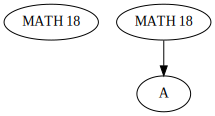

In [316]:
TestGraph = Digraph()
TestGraph.node("MATH 18KEYSUBKEY", label='MATH 18')
for classes in list("MATH 18" in ["MA","MATH 18SUBKEY"])
TestGraph.edge("MATH 18","A")

TestGraph

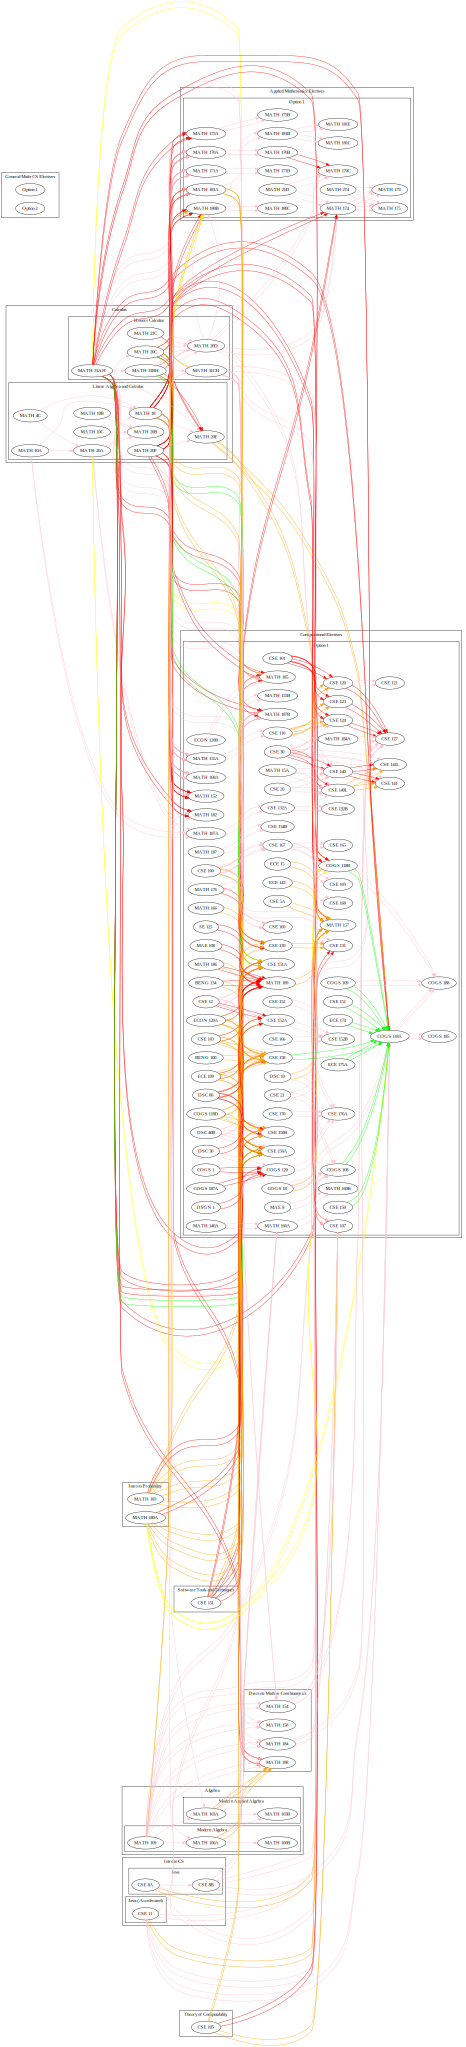

In [318]:
MathCSGraph = Digraph()
MathCSGraph.attr(rankdir = "LR")

Added = [[]]

for key in MathCSDict.keys():
    with MathCSGraph.subgraph(name = "cluster_"+key) as Graph:
        Graph.attr(label = key)
        
        try:
            for subkey in MathCSDict[key].keys():
                with Graph.subgraph(name = "cluster_"+subkey) as SubGraph:
                    SubGraph.attr(label = subkey)
                    for classes in MathCSDict[key][subkey]:
                        if classes not in Added:
                            Added.append([classes, 0])
                        SubGraph.node(classes)
                        colorCounter = 0
                        for prereq in Prereq.set_index('Course Name').loc[classes].get('Prereqs'):
                            if len(prereq) == 1:
                                SubGraph.edge(prereq[0], classes, color=colors[colorCounter])
                            elif len(prereq) > 1:
                                for item in prereq:
                                    SubGraph.edge(item, classes, color=colors[colorCounter])
                            colorCounter += 1
        except:
            for classes in MathCSDict[key]:
                Graph.node(classes)
                colorCounter = 0
                try:
                    for prereq in Prereq.set_index('Course Name').loc[classes].get('Prereqs'):
                        if len(prereq) == 1:
                            SubGraph.edge(prereq[0], classes, color=colors[colorCounter])
                        elif len(prereq) > 1:
                            for item in prereq:
                                SubGraph.edge(item, classes, color=colors[colorCounter])
                        colorCounter += 1
                except:
                    pass

MathCSGraph

In [319]:
MathCSGraph.view()

'Digraph.gv.pdf'

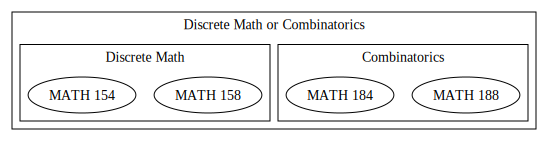

In [21]:
MainGraph = Digraph()

Category = "Discrete Math or Combinatorics"
with MainGraph.subgraph(name = "cluster_"+Category) as TestGraph:
    TestGraph.attr(label = Category)
    
    Category = "Discrete Math"
    with TestGraph.subgraph(name = "cluster_"+Category) as Subgraph:
        Subgraph.attr(label = Category)

        Subgraph.node('MATH 154')
        Subgraph.node('MATH 158')


    Category = "Combinatorics"
    with TestGraph.subgraph(name = "cluster_"+Category) as Subgraph:
        Subgraph.attr(label = Category)

        Subgraph.node('MATH 184')
        Subgraph.node('MATH 188')

MainGraph